## Important Library

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import StandardScaler,minmax_scale
import pickle
import json

## Problem Statement

In [15]:
To predict the Bank Loan Status(YES or NO) by using foloowing data

1.Gender --         - Female
2.Married --        - No
3.Dependents        - 0
4.Education         - Graduate
5.Self_Employed     - No
6.ApplicantIncome   - 3692
7.CoapplicantIncome - 0.0
8.LoanAmount        - 93.0
9.Loan_Amount_Term  - 360.0
10.Credit_History   - 1
11.Property_Area    - Rural


### Data Gathering

In [16]:
dfl=pd.read_csv("loan_data.csv")
dfl

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


#### EDA

In [17]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


#### Encoding

In [18]:
dfl["Gender"].replace({"Male":1,"Female":0},inplace=True)

In [19]:
dfl["Education"].replace({"Graduate":1,"Not Graduate":0},inplace=True)

In [20]:
dfl["Self_Employed"].replace({"Yes":1,"No":0},inplace=True)

In [21]:
dfl["Property_Area"].replace({"Urban":2,"Semiurban":1,"Rural":0},inplace=True)

In [22]:
dfl["Loan_Status"].replace({"Y":1,"N":0},inplace=True)

In [23]:
dfl["Married"].replace({"Yes":1,"No":0},inplace=True)

In [24]:
dfl['Property_Area'].value_counts()

Property_Area
1    149
2    126
0    106
Name: count, dtype: int64

In [97]:
dfl['Loan_Status'].value_counts()

Loan_Status
1    271
0    110
Name: count, dtype: int64

In [25]:
# colum_data = {"Gender":{"Male":1,"Female":0},"Education":{"Graduate":1,"Not Graduate":0},"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Urban":2,"Semiurban":1,"Rural":0},
#              "Loan_Status":{"Y":1,"N":0},"Married":{"Yes":1,"No":0}}

# colum_data

In [26]:
# with open("colum_data1.json",'w') as f:
#     json.dump(colum_data,f)


### Drop unimportant colum

In [27]:
dfl.drop(["Loan_ID","Dependents"],axis=1,inplace=True)

In [28]:
dfl.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
1,1.0,1,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
2,1.0,1,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
3,1.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
4,1.0,1,0,0.0,2333,1516.0,95.0,360.0,1.0,2,1


In [29]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    float64
 1   Married            381 non-null    int64  
 2   Education          381 non-null    int64  
 3   Self_Employed      360 non-null    float64
 4   ApplicantIncome    381 non-null    int64  
 5   CoapplicantIncome  381 non-null    float64
 6   LoanAmount         381 non-null    float64
 7   Loan_Amount_Term   370 non-null    float64
 8   Credit_History     351 non-null    float64
 9   Property_Area      381 non-null    int64  
 10  Loan_Status        381 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 32.9 KB


In [30]:
dfl.isnull().sum()

Gender                5
Married               0
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

#### Handal Missing Values

In [31]:
knn_inputer=KNNImputer(n_neighbors=3)
newdfl=knn_inputer.fit_transform(dfl)
df=pd.DataFrame(newdfl,columns=dfl.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    float64
 1   Married            381 non-null    float64
 2   Education          381 non-null    float64
 3   Self_Employed      381 non-null    float64
 4   ApplicantIncome    381 non-null    float64
 5   CoapplicantIncome  381 non-null    float64
 6   LoanAmount         381 non-null    float64
 7   Loan_Amount_Term   381 non-null    float64
 8   Credit_History     381 non-null    float64
 9   Property_Area      381 non-null    float64
 10  Loan_Status        381 non-null    float64
dtypes: float64(11)
memory usage: 32.9 KB


In [32]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

#### Outlires Detection

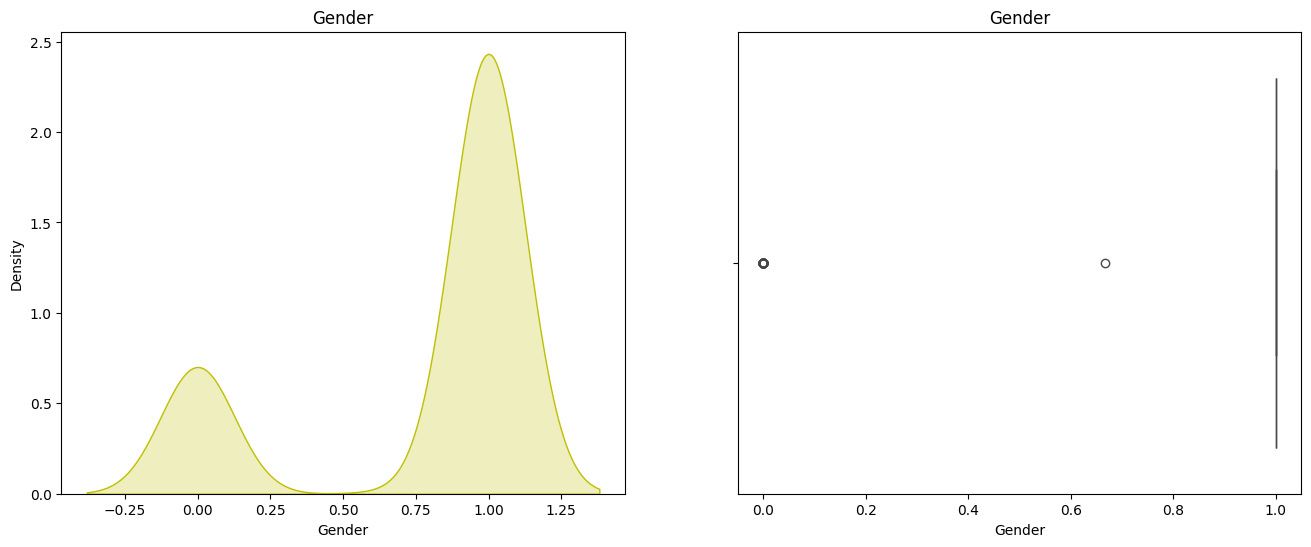

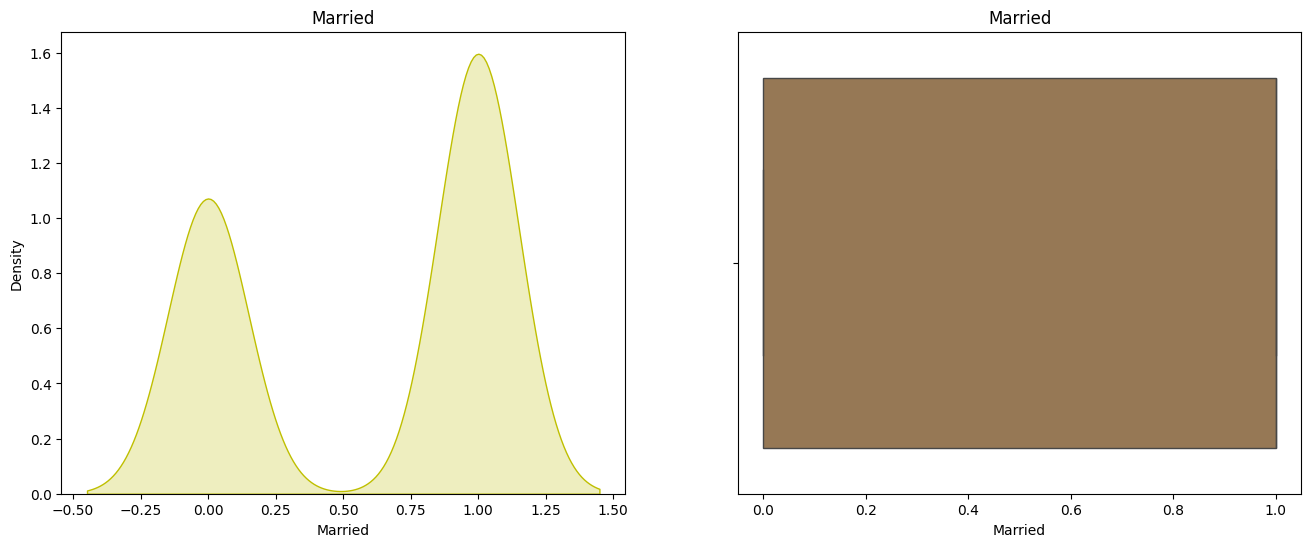

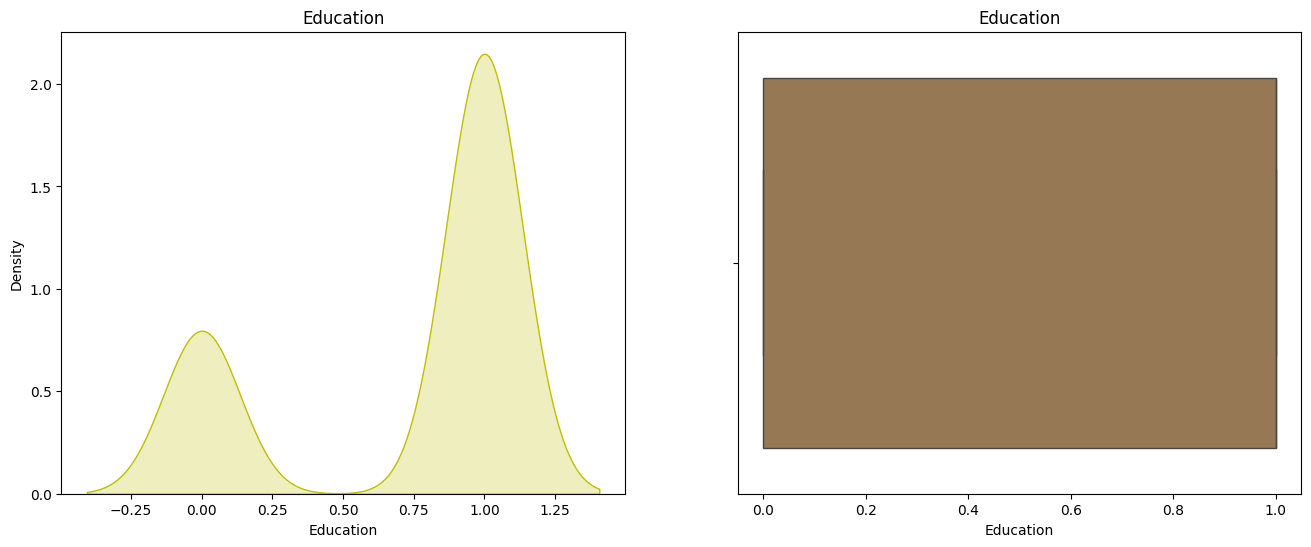

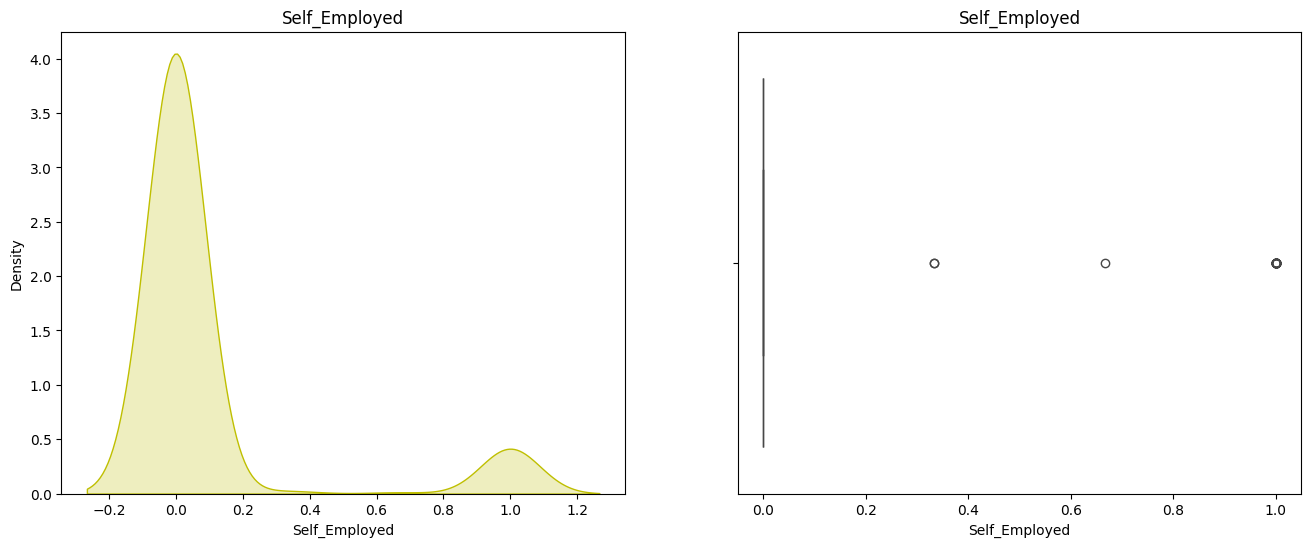

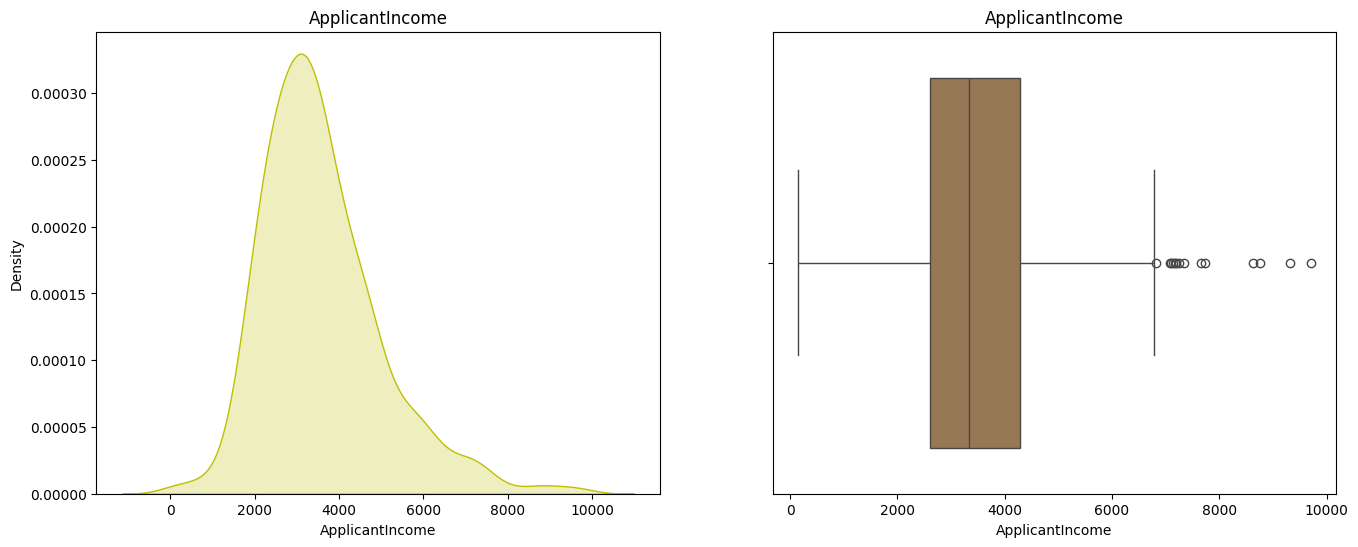

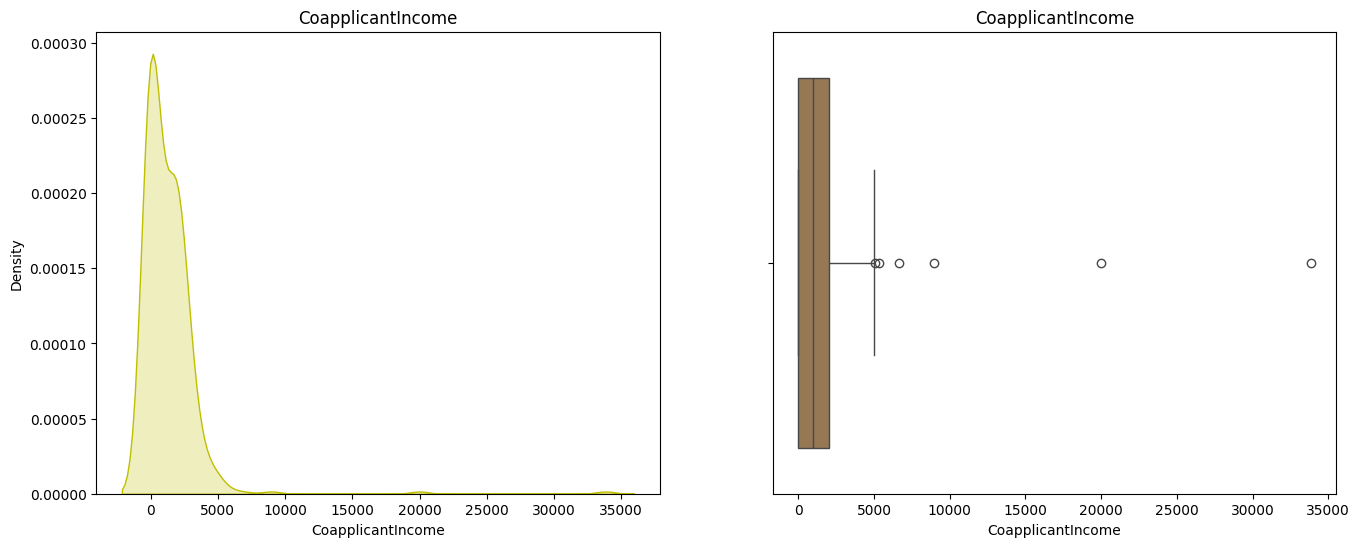

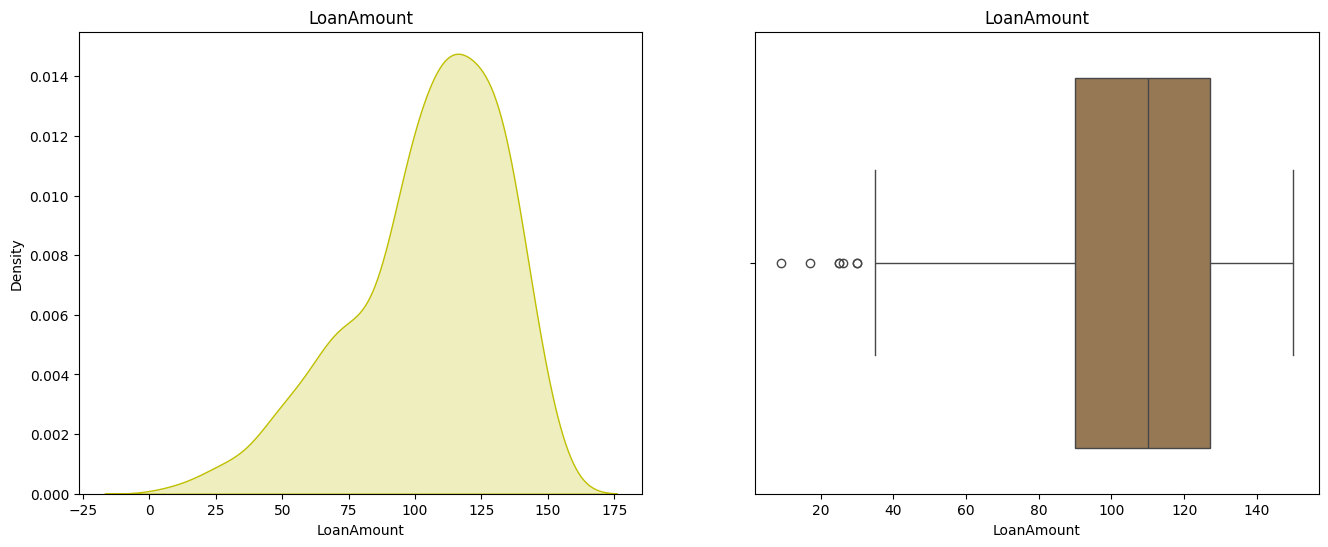

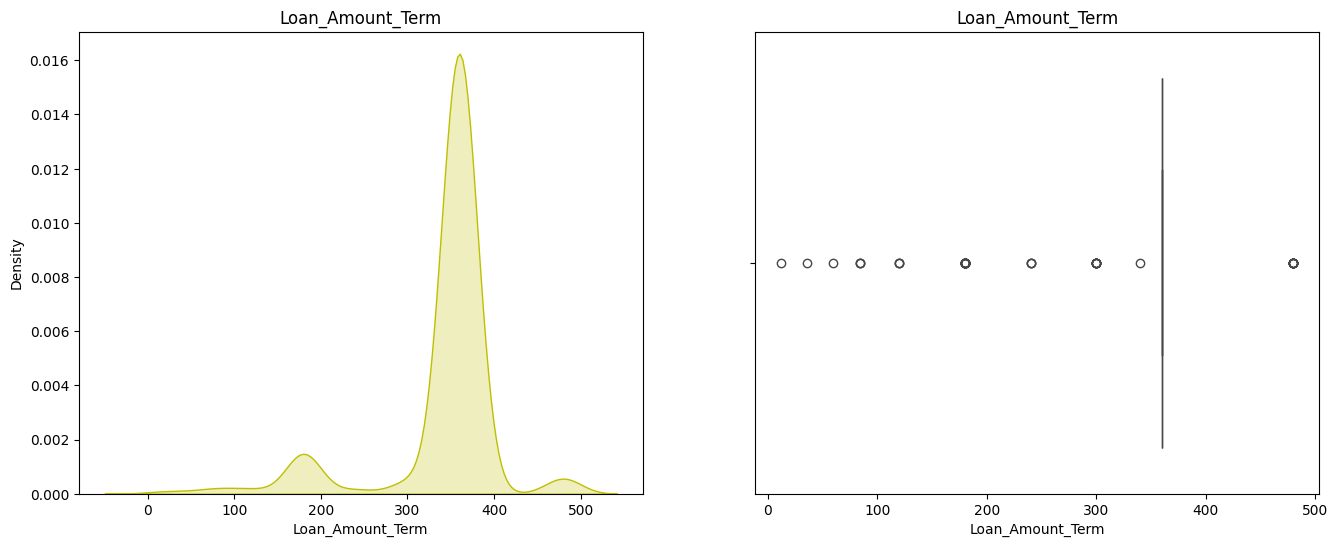

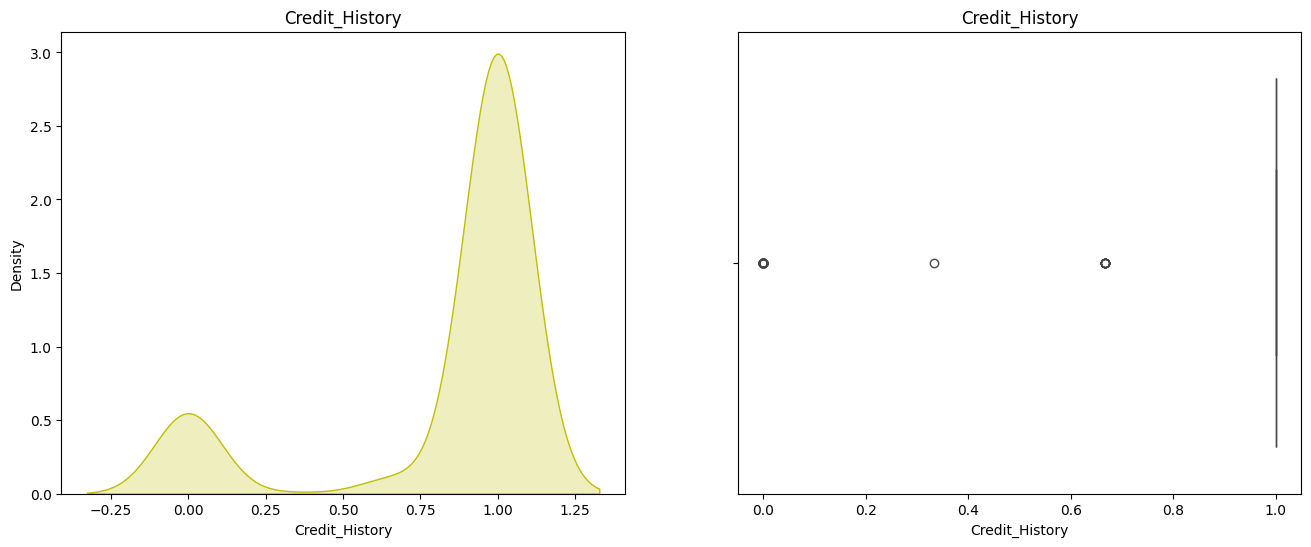

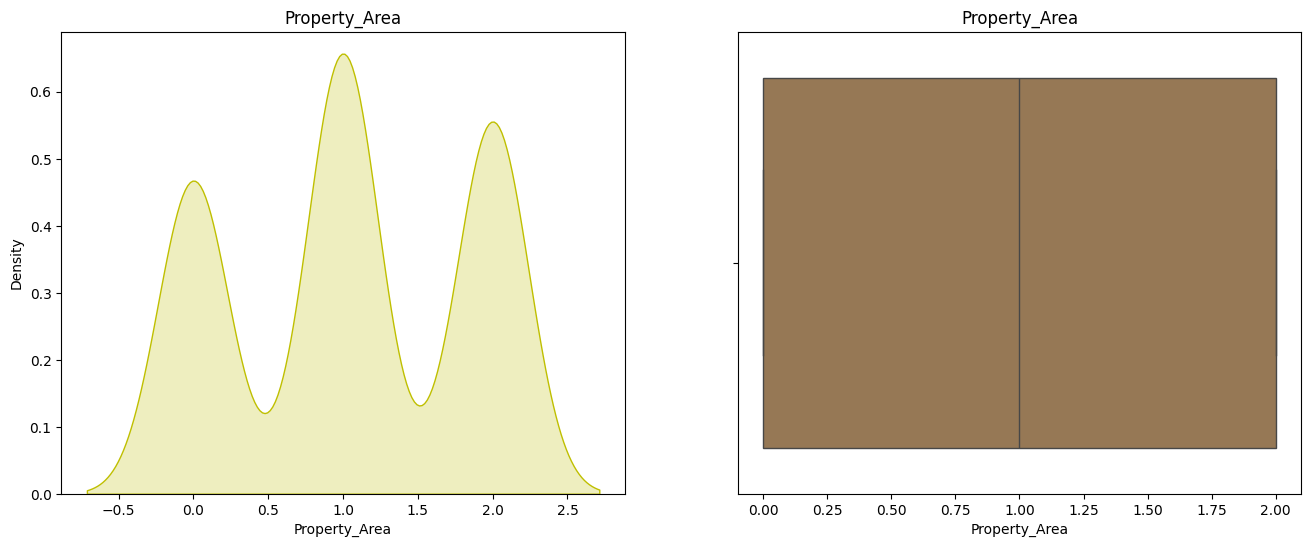

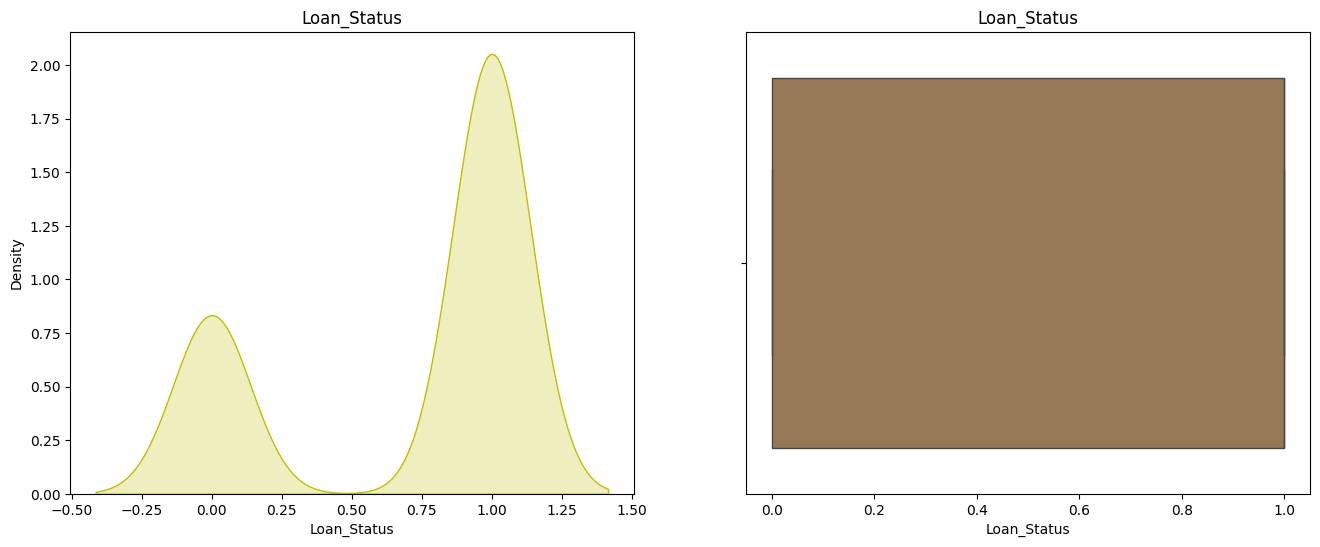

In [33]:
for col in df.columns:
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.kdeplot(df[col],color='y',fill=True)
    plt.title(col)
    
    plt.subplot(122)
    sns.boxplot(x=df[col],palette='cubehelix')
    plt.title(col)

In [34]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

#### Handle Outliers

#### 1

In [35]:
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)
IQR = q3-q1
lower_tail = q1 - (1.5 * IQR)
upper_tail = q3 + (1.5 * IQR)


outliers_index_above_uppertail = np.where(df['ApplicantIncome'] > upper_tail)
outliers_index_below_lowertail = np.where(df['ApplicantIncome'] < lower_tail)


print(outliers_index_above_uppertail)
print(outliers_index_below_lowertail)

(array([ 14,  49,  72,  99, 153, 163, 228, 235, 240, 269, 275, 280, 290,
       294], dtype=int64),)
(array([], dtype=int64),)


In [36]:
df["ApplicantIncome"].iloc[outliers_index_above_uppertail]=df["ApplicantIncome"].mean()
df["ApplicantIncome"].iloc[outliers_index_below_lowertail]=df["ApplicantIncome"].mean()

#### 2

In [37]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = q3-q1
lower_tail = q1 - (1.5 * IQR)
upper_tail = q3 + (1.5 * IQR)


outliers_index_above_uppertail = np.where(df['CoapplicantIncome'] > upper_tail)
outliers_index_below_lowertail = np.where(df['CoapplicantIncome'] < lower_tail)


print(outliers_index_above_uppertail)
print(outliers_index_below_lowertail)

(array([ 79, 110, 256, 319, 324, 364], dtype=int64),)
(array([], dtype=int64),)


In [38]:
df["CoapplicantIncome"].iloc[outliers_index_above_uppertail]=df["CoapplicantIncome"].mean()
df["CoapplicantIncome"].iloc[outliers_index_below_lowertail]=df["CoapplicantIncome"].mean()

#### 3

In [39]:
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
IQR = q3-q1
lower_tail = q1 - (1.5 * IQR)
upper_tail = q3 + (1.5 * IQR)


outliers_index_above_uppertail = np.where(df['LoanAmount'] > upper_tail)
outliers_index_below_lowertail = np.where(df['LoanAmount'] < lower_tail)


print(outliers_index_above_uppertail)
print(outliers_index_below_lowertail)

(array([], dtype=int64),)
(array([  8,  65,  84,  91, 168, 350, 357], dtype=int64),)


In [40]:
df["LoanAmount"].iloc[outliers_index_above_uppertail]=df["LoanAmount"].mean()
df["LoanAmount"].iloc[outliers_index_below_lowertail]=df["LoanAmount"].mean()

#### 4

In [41]:
q1 = df['Loan_Amount_Term'].quantile(0.25)
q3 = df['Loan_Amount_Term'].quantile(0.75)
IQR = q3-q1
lower_tail = q1 - (1.5 * IQR)
upper_tail = q3 + (1.5 * IQR)


outliers_index_above_uppertail = np.where(df['Loan_Amount_Term'] > upper_tail)
outliers_index_below_lowertail = np.where(df['Loan_Amount_Term'] < lower_tail)


print(outliers_index_above_uppertail)
print(outliers_index_below_lowertail)

(array([ 54,  73, 102, 109, 155, 185, 224, 230, 237, 317, 326], dtype=int64),)
(array([  8,  10,  24,  48,  49,  52,  58,  65,  68,  70,  84,  99, 104,
       111, 113, 142, 149, 152, 154, 176, 179, 199, 200, 213, 222, 227,
       232, 234, 242, 247, 254, 255, 267, 274, 287, 289, 294, 298, 301,
       313, 315, 320, 324, 340, 345, 349, 360, 372, 373, 379], dtype=int64),)


In [42]:
df["Loan_Amount_Term"].iloc[outliers_index_above_uppertail]=df["Loan_Amount_Term"].mean()
df["Loan_Amount_Term"].iloc[outliers_index_below_lowertail]=df["Loan_Amount_Term"].mean()

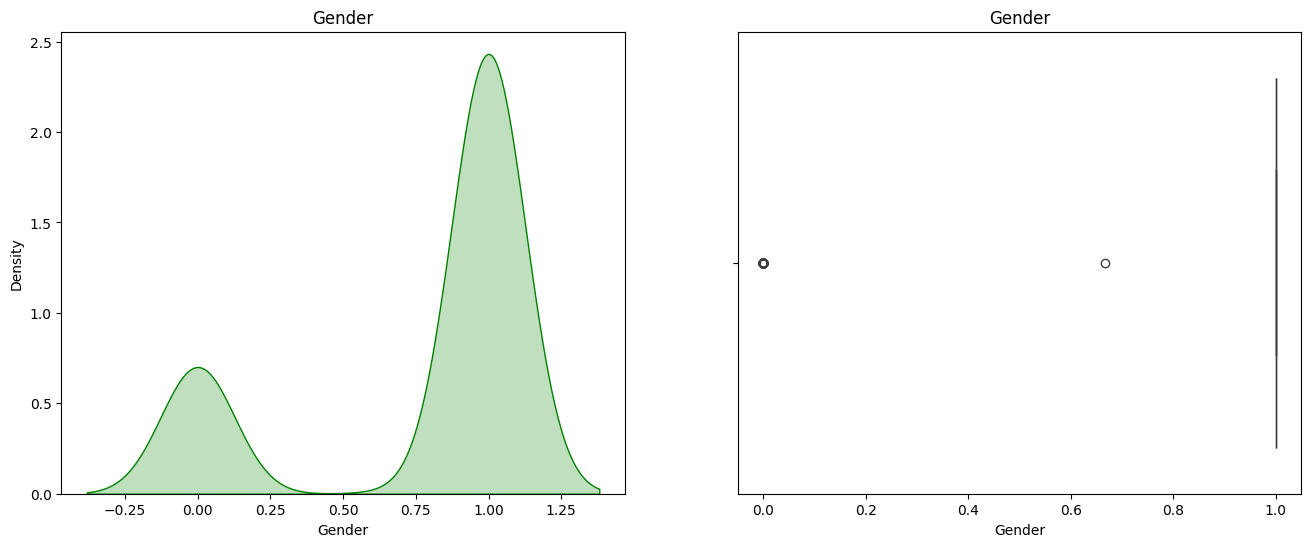

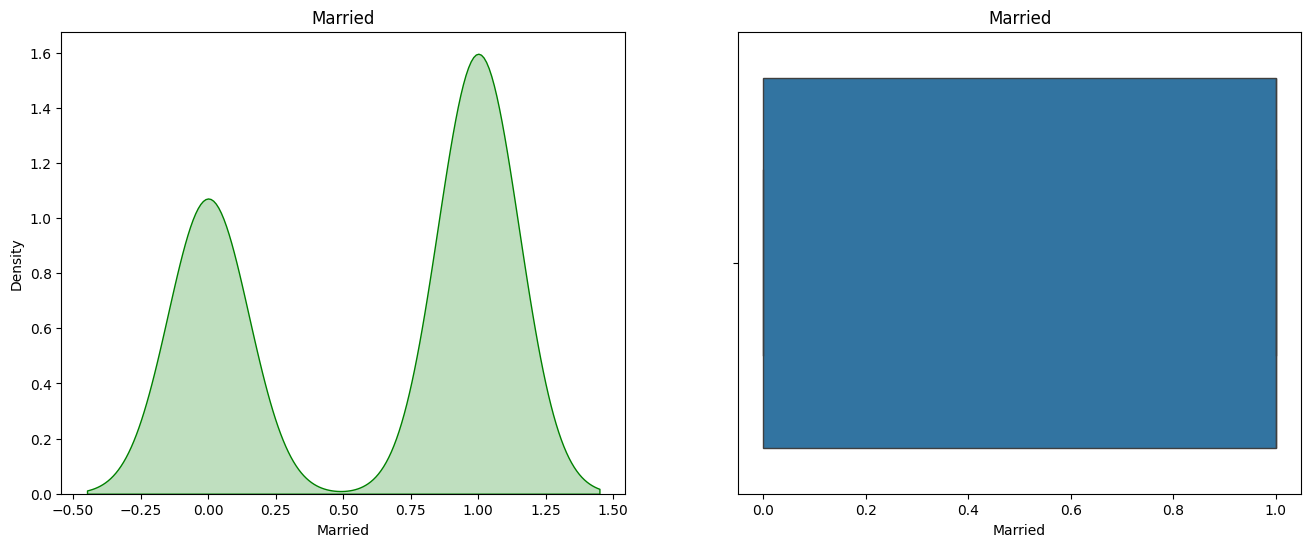

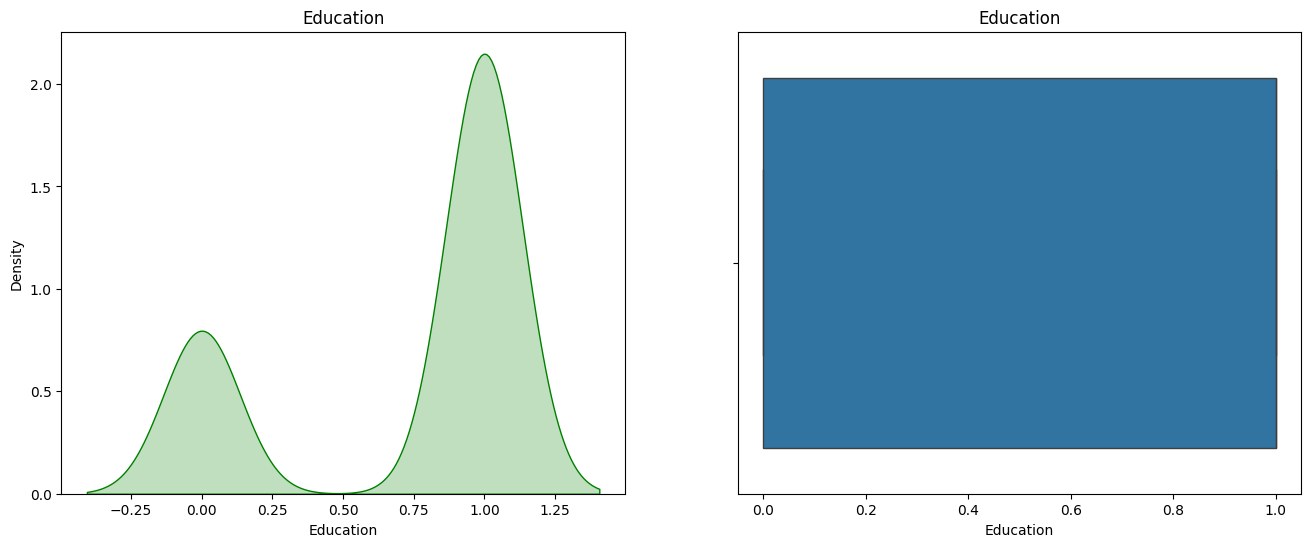

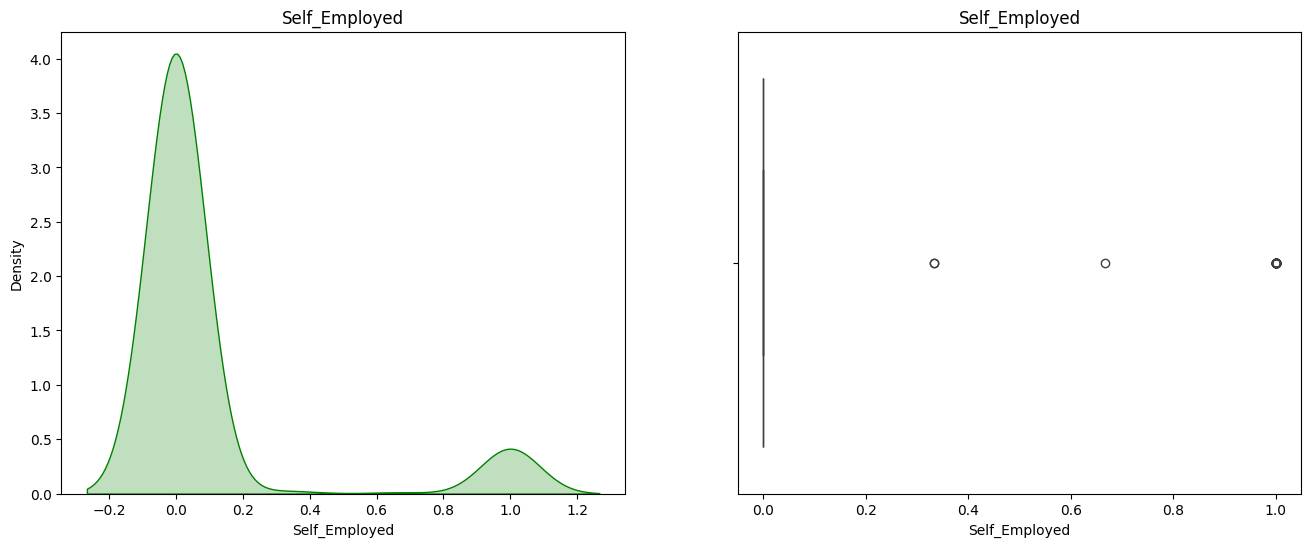

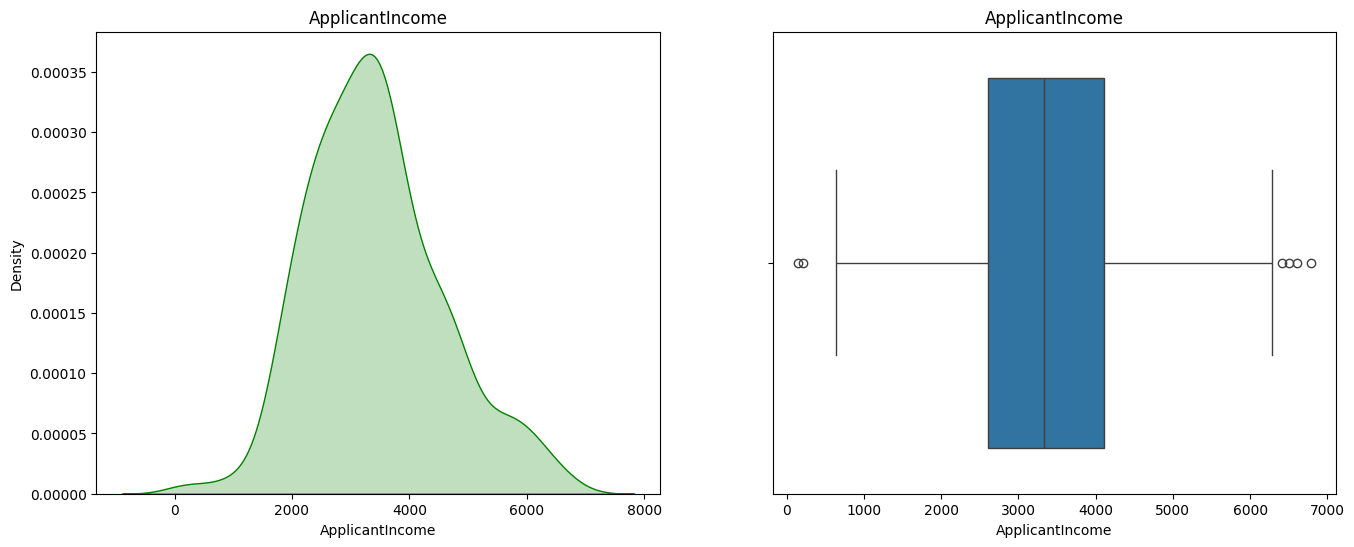

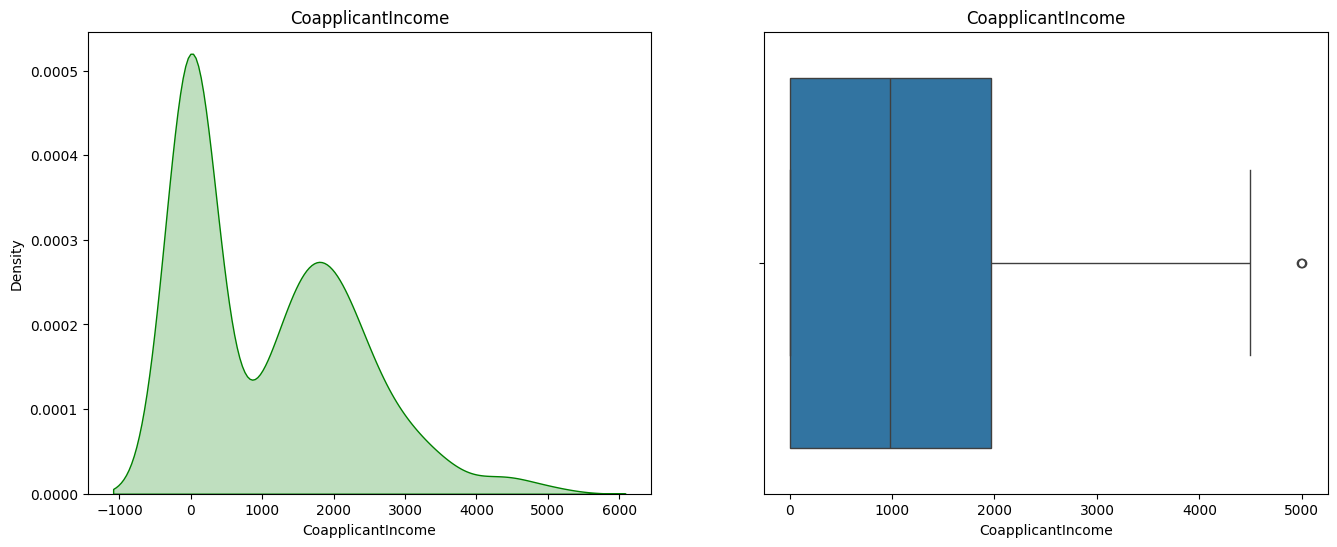

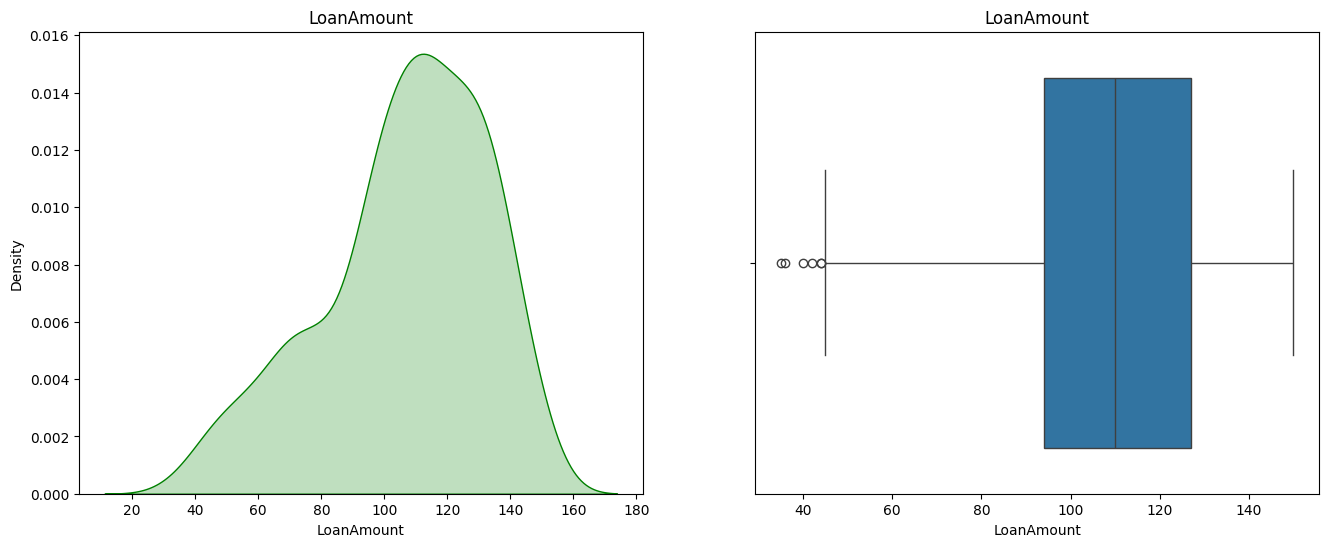

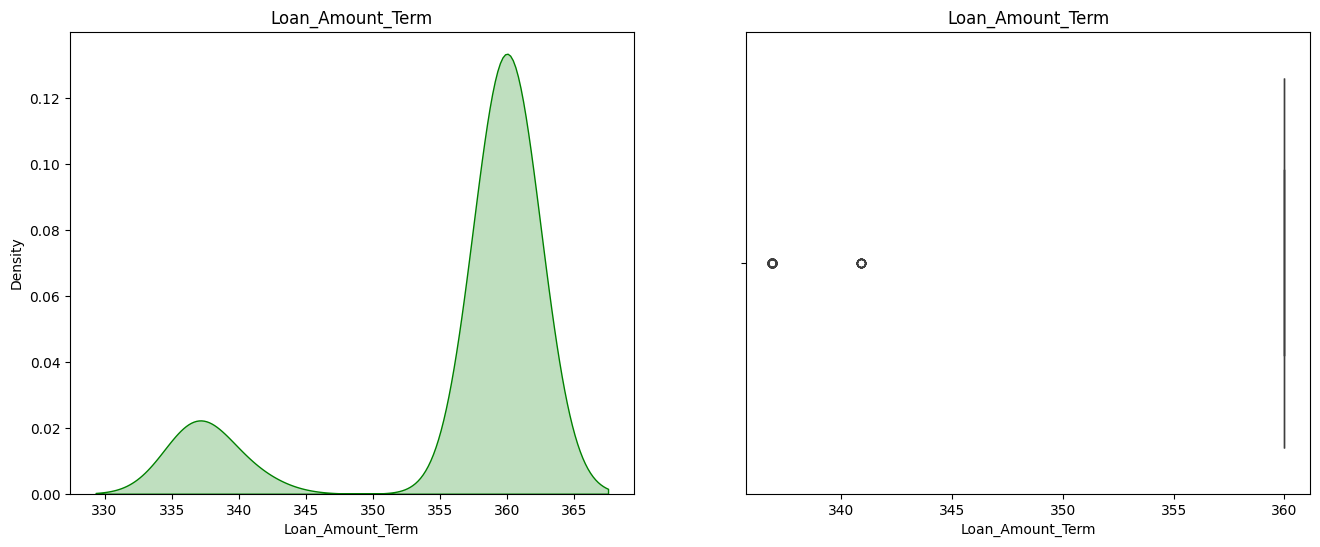

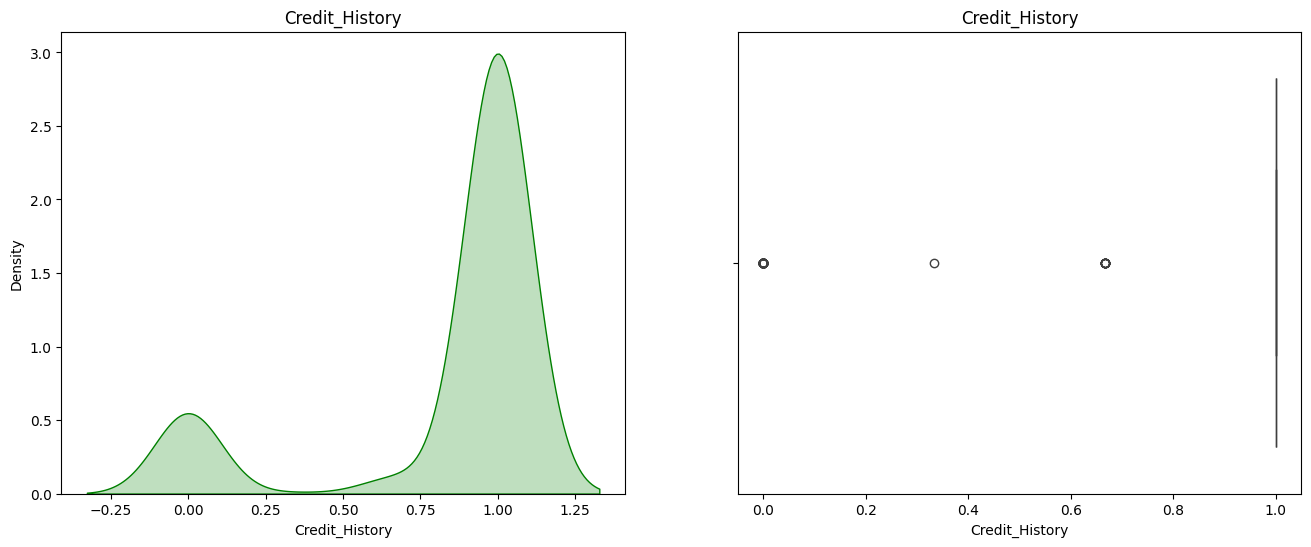

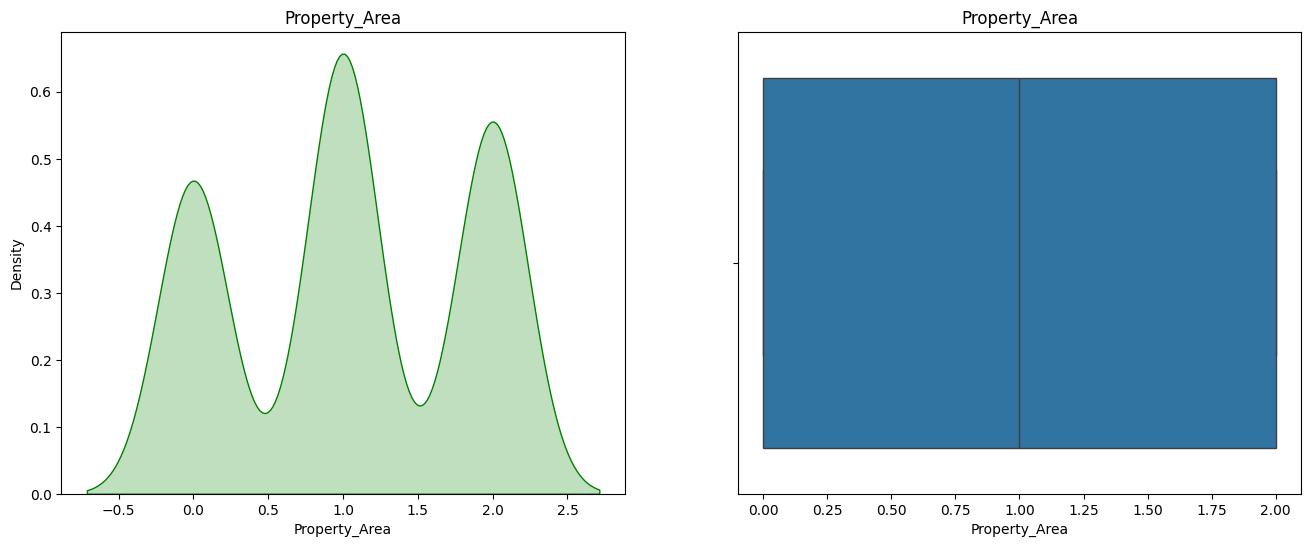

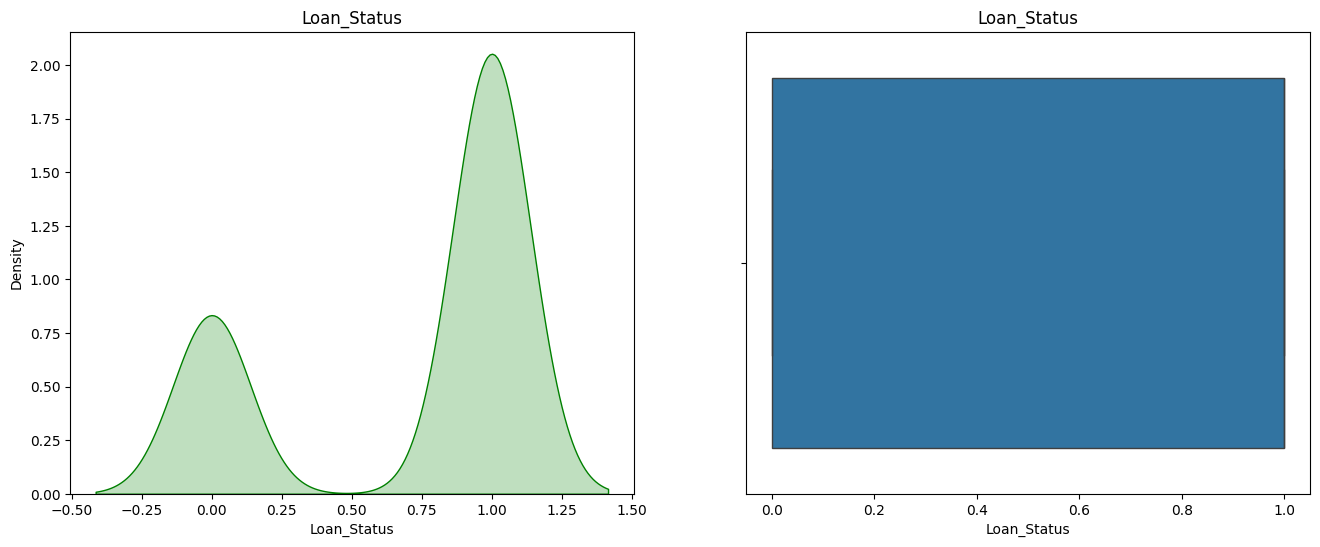

In [43]:
for col in df.columns:
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.kdeplot(df[col],color="g",fill=True)
    plt.title(col)
    
    plt.subplot(122)
    sns.boxplot(x=df[col])
    plt.title(col)

In [44]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

### scaling

In [45]:
std_scale_a=StandardScaler()
arr1=std_scale_a.fit_transform(df[["ApplicantIncome"]])
a=pd.DataFrame(arr1,columns=["ApplicantIncome"])
df[["ApplicantIncome"]]=a

In [46]:
std_scale_a=StandardScaler()
arr2=std_scale_a.fit_transform(df[["CoapplicantIncome"]])
b=pd.DataFrame(arr2,columns=["CoapplicantIncome"])
df[["CoapplicantIncome"]]=b

In [47]:
std_scale_a=StandardScaler()
arr3=std_scale_a.fit_transform(df[["LoanAmount"]])
c=pd.DataFrame(arr1,columns=["LoanAmount"])
df[["LoanAmount"]]=c

In [48]:
std_scale_a=StandardScaler()
arr4=std_scale_a.fit_transform(df[["Loan_Amount_Term"]])
d=pd.DataFrame(arr1,columns=["Loan_Amount_Term"])
df[["Loan_Amount_Term"]]=d

In [49]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,0.0,1.011419,0.353294,1.011419,1.011419,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,-0.371877,-0.914642,-0.371877,-0.371877,1.0,2.0,1.0
2,1.0,1.0,0.0,0.0,-0.736270,1.067980,-0.736270,-0.736270,1.0,2.0,1.0
3,1.0,0.0,1.0,0.0,2.249657,-0.914642,2.249657,2.249657,1.0,2.0,1.0
4,1.0,1.0,0.0,0.0,-0.954731,0.360021,-0.954731,-0.954731,1.0,2.0,1.0


#### Define Independant & Dependant Variable

In [50]:
x=df.drop("Loan_Status",axis=1)
y=df[["Loan_Status"]]

### Model Training

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

## 1.LogisticRegression

In [52]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
#### Training ####

y_pred_train=lr.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 43  44]
 [  5 212]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.90      0.49      0.64        87
         1.0       0.83      0.98      0.90       217

    accuracy                           0.84       304
   macro avg       0.86      0.74      0.77       304
weighted avg       0.85      0.84      0.82       304



In [54]:
#### Testing ####

y_pred_test=lr.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[12 11]
 [ 0 54]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       1.00      0.52      0.69        23
         1.0       0.83      1.00      0.91        54

    accuracy                           0.86        77
   macro avg       0.92      0.76      0.80        77
weighted avg       0.88      0.86      0.84        77



In [55]:
accuracy_train = 0.84
accuracy_test =  0.86

## 2.KNN Classifier

In [56]:
kn_cl=KNeighborsClassifier()
kn_cl.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
#### Training ####

y_pred_train=kn_cl.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 40  47]
 [ 11 206]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.78      0.46      0.58        87
         1.0       0.81      0.95      0.88       217

    accuracy                           0.81       304
   macro avg       0.80      0.70      0.73       304
weighted avg       0.81      0.81      0.79       304



In [58]:
#### Testing ####

y_pred_test=kn_cl.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 7 16]
 [ 2 52]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.78      0.30      0.44        23
         1.0       0.76      0.96      0.85        54

    accuracy                           0.77        77
   macro avg       0.77      0.63      0.64        77
weighted avg       0.77      0.77      0.73        77



In [59]:
accuracy_train = 0.81
accuracy_test =  0.75

#### finding best k values

k=  14
train_r2_score list  
 [0.997, 0.872, 0.865, 0.852, 0.809, 0.812, 0.826, 0.819, 0.809, 0.819, 0.803, 0.812, 0.773, 0.783]
test_r2_score list  
 [0.766, 0.662, 0.753, 0.766, 0.766, 0.766, 0.753, 0.779, 0.805, 0.792, 0.779, 0.766, 0.766, 0.779]


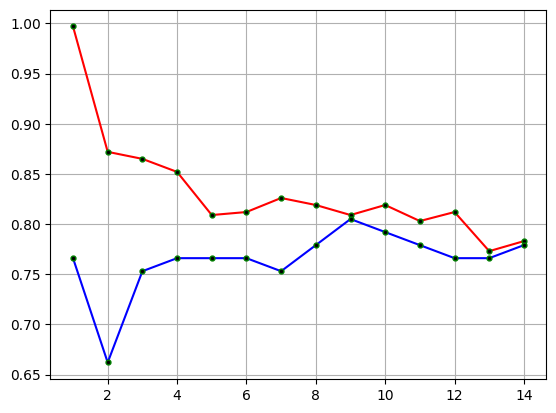

In [60]:
### p=2

k_values = np.arange(1,15)
train_r2_score = []
test_r2_score = []
for k in k_values:
    kn_cl=KNeighborsClassifier(n_neighbors=k, p=2)
    kn_cl.fit(x_train,y_train)
    train_r2_score.append(np.around(kn_cl.score(x_train, y_train),3))
    test_r2_score.append(np.around(kn_cl.score(x_test, y_test),3))

print("k= ",k)
print("train_r2_score list  \n",train_r2_score)
print("test_r2_score list  \n",test_r2_score)

plt.plot(k_values,train_r2_score,c="red",marker=".",ms=7,mfc="black",mec="green")
plt.plot(k_values,test_r2_score,c="blue",marker=".",ms=7,mfc="black",mec="green")
plt.grid(True)
plt.show()

k=  14
train_r2_score list  
 [0.997, 0.872, 0.855, 0.822, 0.793, 0.816, 0.806, 0.803, 0.789, 0.812, 0.799, 0.806, 0.776, 0.796]
test_r2_score list  
 [0.766, 0.701, 0.792, 0.74, 0.766, 0.753, 0.74, 0.766, 0.766, 0.779, 0.753, 0.779, 0.766, 0.766]


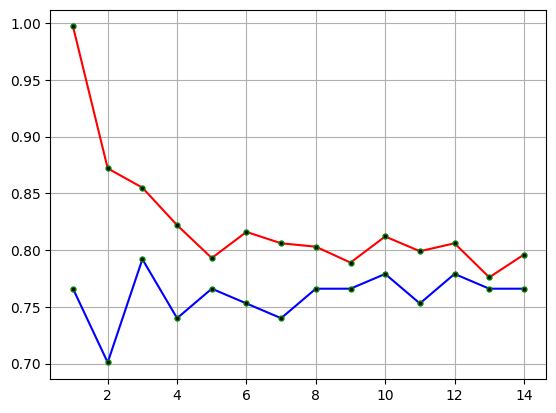

In [61]:
### p=1

k_values = np.arange(1,15)
train_r2_score = []
test_r2_score = []
for k in k_values:
    kn_cl=KNeighborsClassifier(n_neighbors=k, p=1)
    kn_cl.fit(x_train,y_train)
    train_r2_score.append(np.around(kn_cl.score(x_train, y_train),3))
    test_r2_score.append(np.around(kn_cl.score(x_test, y_test),3))

print("k= ",k)
print("train_r2_score list  \n",train_r2_score)
print("test_r2_score list  \n",test_r2_score)

plt.plot(k_values,train_r2_score,c="red",marker=".",ms=7,mfc="black",mec="green")
plt.plot(k_values,test_r2_score,c="blue",marker=".",ms=7,mfc="black",mec="green")
plt.grid(True)
plt.show()

In [62]:
###  Best neighbors=10,p=2 #####

kn_cl=KNeighborsClassifier(n_neighbors=10,p=2)
kn_cl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [63]:
#### Training ####

y_pred_train=kn_cl.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 41  46]
 [  9 208]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.82      0.47      0.60        87
         1.0       0.82      0.96      0.88       217

    accuracy                           0.82       304
   macro avg       0.82      0.71      0.74       304
weighted avg       0.82      0.82      0.80       304



In [64]:
#### Testing ####

y_pred_test=kn_cl.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 8 15]
 [ 1 53]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.89      0.35      0.50        23
         1.0       0.78      0.98      0.87        54

    accuracy                           0.79        77
   macro avg       0.83      0.66      0.68        77
weighted avg       0.81      0.79      0.76        77



In [65]:
accuracy_train = 0.81
accuracy_test =  0.81

## 3.Decision Tree Classifier

In [66]:
dt_c=DecisionTreeClassifier(random_state=1)
dt_c.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [67]:
#### Training ####

y_pred_train=dt_c.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 87   0]
 [  1 216]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        87
         1.0       1.00      1.00      1.00       217

    accuracy                           1.00       304
   macro avg       0.99      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304



In [68]:
#### Testing ####

y_pred_test=dt_c.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[10 13]
 [ 5 49]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.67      0.43      0.53        23
         1.0       0.79      0.91      0.84        54

    accuracy                           0.77        77
   macro avg       0.73      0.67      0.69        77
weighted avg       0.75      0.77      0.75        77



In [69]:
accuracy_train = 1
accuracy_test =  0.71

#### HyperParameter Tuning

In [71]:
dt_c=DecisionTreeClassifier(random_state=1)


hyp_grid = {'criterion' :['gini','entropy'],
            'max_depth' : np.arange(5,10),
            'min_samples_split' :np.arange(10,15),
            'min_samples_leaf' : np.arange(3,6) }
gs_cv_dt=GridSearchCV(dt_c,param_grid=hyp_grid,cv=3,n_jobs=-1)
gs_cv_dt.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([10, 11, 12, 13, 14])})

In [72]:
gs_cv_dt.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=13,
                       random_state=1)

In [73]:
gs_cv_dt_ht=gs_cv_dt.best_estimator_
gs_cv_dt_ht.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=13,
                       random_state=1)

In [74]:
#### Training ####

y_pred_train=gs_cv_dt_ht.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 60  27]
 [ 13 204]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.82      0.69      0.75        87
         1.0       0.88      0.94      0.91       217

    accuracy                           0.87       304
   macro avg       0.85      0.81      0.83       304
weighted avg       0.87      0.87      0.86       304



In [75]:
#### Testing ####

y_pred_test=gs_cv_dt_ht.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[13 10]
 [ 5 49]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.72      0.57      0.63        23
         1.0       0.83      0.91      0.87        54

    accuracy                           0.81        77
   macro avg       0.78      0.74      0.75        77
weighted avg       0.80      0.81      0.80        77



In [76]:
accuracy_train = 0.87
accuracy_test =  0.77

## 4.RandomForest

In [77]:
rf_c=RandomForestClassifier(random_state=1)
rf_c.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [78]:
#### Training ####

y_pred_train=rf_c.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 86   1]
 [  0 217]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        87
         1.0       1.00      1.00      1.00       217

    accuracy                           1.00       304
   macro avg       1.00      0.99      1.00       304
weighted avg       1.00      1.00      1.00       304



In [79]:
#### Testing ####

y_pred_test=rf_c.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[14  9]
 [ 3 51]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.82      0.61      0.70        23
         1.0       0.85      0.94      0.89        54

    accuracy                           0.84        77
   macro avg       0.84      0.78      0.80        77
weighted avg       0.84      0.84      0.84        77



In [80]:
accuracy_train = 1
accuracy_test =  0.83

#### Hyperparameter Tuning

In [81]:
rf_c=RandomForestClassifier(random_state=1)

hyp_grid = {"n_estimators":np.arange(10,100,5),
            "criterion" : ['gini','entropy'],
            "max_depth" : np.arange(5,10),
            "min_samples_split" : np.arange(10,15),
            "min_samples_leaf" : np.arange(3,8)}

gs_cv_rf_c = GridSearchCV(rf_c,param_grid=hyp_grid,cv=3,n_jobs=-1)
gs_cv_rf_c.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7]),
                         'min_samples_split': array([10, 11, 12, 13, 14]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])})

In [82]:
gs_cv_rf_c.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=14,
                       n_estimators=30, random_state=1)

In [83]:
rf_c_h=gs_cv_rf_c.best_estimator_
rf_c_h.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=14,
                       n_estimators=30, random_state=1)

In [84]:
#### Training ####

y_pred_train=rf_c_h.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 46  41]
 [  3 214]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.94      0.53      0.68        87
         1.0       0.84      0.99      0.91       217

    accuracy                           0.86       304
   macro avg       0.89      0.76      0.79       304
weighted avg       0.87      0.86      0.84       304



In [85]:
#### Testing ####

y_pred_test=rf_c_h.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[12 11]
 [ 0 54]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       1.00      0.52      0.69        23
         1.0       0.83      1.00      0.91        54

    accuracy                           0.86        77
   macro avg       0.92      0.76      0.80        77
weighted avg       0.88      0.86      0.84        77



In [86]:
accuracy_train = 0.85
accuracy_test =  0.84

## 5. Adaboost Classifier

In [87]:
adb_c=AdaBoostClassifier()
adb_c.fit(x_train,y_train)

AdaBoostClassifier()

In [88]:
#### Training ####

y_pred_train=adb_c.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 50  37]
 [  4 213]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.57      0.71        87
         1.0       0.85      0.98      0.91       217

    accuracy                           0.87       304
   macro avg       0.89      0.78      0.81       304
weighted avg       0.87      0.87      0.85       304



In [89]:
#### Testing ####

y_pred_test=adb_c.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[12 11]
 [ 2 52]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.86      0.52      0.65        23
         1.0       0.83      0.96      0.89        54

    accuracy                           0.83        77
   macro avg       0.84      0.74      0.77        77
weighted avg       0.83      0.83      0.82        77



In [90]:
accuracy_train = 0.86
accuracy_test =  0.81

#### HyperParameter Tuning

In [91]:
adb_c=AdaBoostClassifier()

hyp_grid = {"n_estimators":np.arange(10,100,5),
             'learning_rate': np.arange(0,1,0.1)}

gs_cv_adb_c = GridSearchCV(adb_c,param_grid=hyp_grid,cv=3,n_jobs=-1)
gs_cv_adb_c.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])})

In [92]:
gs_cv_adb_c.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=10)

In [93]:
adb_c_hpt=gs_cv_adb_c.best_estimator_
adb_c_hpt.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=10)

In [94]:
#### Training ####

y_pred_train=adb_c_hpt.predict(x_train)
c_f_m=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_train,y_pred_train)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_train,y_pred_train)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[ 43  44]
 [  3 214]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       0.93      0.49      0.65        87
         1.0       0.83      0.99      0.90       217

    accuracy                           0.85       304
   macro avg       0.88      0.74      0.77       304
weighted avg       0.86      0.85      0.83       304



In [95]:
#### Testing ####

y_pred_test=adb_c_hpt.predict(x_test)
c_f_m=confusion_matrix(y_test,y_pred_test)
print("confusion_matrix \n",c_f_m)
print("*"*50)
c_f_r=classification_report(y_test,y_pred_test)
print("classification_report \n",c_f_r)
# acc=accuracy_score(y_test,y_pred_test)
# print("accuracy_score \n",acc)

confusion_matrix 
 [[11 12]
 [ 0 54]]
**************************************************
classification_report 
               precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        23
         1.0       0.82      1.00      0.90        54

    accuracy                           0.84        77
   macro avg       0.91      0.74      0.77        77
weighted avg       0.87      0.84      0.82        77



In [96]:
accuracy_train = 0.85
accuracy_test =  0.84

#### Conclusion

In [ ]:
     ML Models    -     Logistic Reg.     KNN.         Decision Tree.         Random Forest.            Adaboost.              
Training Accuracy -        84.00      81.00   81.00     1.00   0.87          1.00    0.85(H)         0.86    0.85(H) 
Testing Accuracy  -        86.00      75.00   81.00     0.71   0.77          0.83    0.84(H)         0.81    0.84(H)

#### Best Model

In [ ]:
1.KNN
2.Logistic Regression
3.Random Forest.
4.Adaboost.

### Best Model Test File

In [98]:
with open("Loan...KNN_clf_model.pkl", 'wb') as f:
    pickle.dump(kn_cl, f)

In [99]:
colum_data = {"Gender":{"Male":1,"Female":0},"Education":{"Graduate":1,"Not Graduate":0},"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Urban":2,"Semiurban":1,"Rural":0},
             "Loan_Status":{"Y":1,"N":0},"Married":{"Yes":1,"No":0}}

colum_data

{'Gender': {'Male': 1, 'Female': 0},
 'Education': {'Graduate': 1, 'Not Graduate': 0},
 'Self_Employed': {'Yes': 1, 'No': 0},
 'Property_Area': {'Urban': 2, 'Semiurban': 1, 'Rural': 0},
 'Loan_Status': {'Y': 1, 'N': 0},
 'Married': {'Yes': 1, 'No': 0}}

In [100]:
with open("colum_data1.json",'w') as f:
    json.dump(colum_data,f)
